In [4]:
import pandas as pd
import json
from datetime import datetime
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.cluster.hierarchy as sch
import sqlite3
import warnings
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [5]:
import pandas as pd
import sqlite3

# Caminho para o banco de dados
db_path = '/Users/leonardooliveira/Desktop/untitled folder/Experimentai/preparacao/Experimentai.db'
conn = sqlite3.connect(db_path)

# Leitura das tabelas do banco de dados
df_gosto = pd.read_sql_query("SELECT * FROM dim_gosto_cliente;", conn)
df_demografico = pd.read_sql_query("SELECT * FROM dim_demografico_cliente;", conn)
df_cliente_fato = pd.read_sql_query("SELECT * FROM fato_cliente;", conn)

# Fechar a conexão com o banco de dados
conn.close()

# Fazer o merge usando outer join para incluir todas as linhas
base = pd.merge(df_cliente_fato, df_gosto, on='id_gosto_base', how='inner')
base = pd.merge(base, df_demografico, on='id_demografico_base', how='inner')
base.isnull().sum()


id_fato_base                0
id_demografico_base         0
id_gosto_base               0
data_inscricao              0
rede_social                 0
faixa_renda                 0
objetivo                    0
tem_cupom                   0
assinantes                  0
moda                        0
pessoa_artistica            0
maquiagem                   0
brinquedos_ou_jogos         0
esportes                    0
tem_pet                     0
decorar_casa                0
alimento_saudavel           0
gastronomia                 0
carro                       0
bebida_alcoolica            0
cuidados_pessoais           0
tecnologia                  0
mae_ou_pai                  0
influencer                  0
restricoes_alimentares      0
nome                        0
sobrenome                   0
data_nascimento             6
genero                      0
cidade                      0
estado                      0
bairro                      0
idade                       6
faixa_etar

In [6]:
base.columns

Index(['id_fato_base', 'id_demografico_base', 'id_gosto_base',
       'data_inscricao', 'rede_social', 'faixa_renda', 'objetivo', 'tem_cupom',
       'assinantes', 'moda', 'pessoa_artistica', 'maquiagem',
       'brinquedos_ou_jogos', 'esportes', 'tem_pet', 'decorar_casa',
       'alimento_saudavel', 'gastronomia', 'carro', 'bebida_alcoolica',
       'cuidados_pessoais', 'tecnologia', 'mae_ou_pai', 'influencer',
       'restricoes_alimentares', 'nome', 'sobrenome', 'data_nascimento',
       'genero', 'cidade', 'estado', 'bairro', 'idade', 'faixa_etaria'],
      dtype='object')

In [7]:
del base['data_inscricao']
del base['faixa_etaria']
del base['nome']
del base['sobrenome']


In [8]:
base = base.fillna(18)

In [9]:
assinantes = base[base['assinantes'] == 1]
base['assinantes'] = base['assinantes'].fillna(0)

nao_assinantes = base[base['assinantes'] == 0]

assinantes1 = assinantes

In [10]:
nao_assinantes.head()

,id_fato_base,id_demografico_base,id_gosto_base,rede_social,faixa_renda,objetivo,tem_cupom,assinantes,moda,pessoa_artistica,...,tecnologia,mae_ou_pai,influencer,restricoes_alimentares,data_nascimento,genero,cidade,estado,bairro,idade
0,1,1,1,0,R$16.000 - 24.000,Quero dar a minha opinião sobre produtos,0,0,0,1,...,1,0,0,Não tenho restrição,2024-05-12 00:00:00,Feminino,Itaquaquecetuba,São Paulo,Jardim Nossa Senhora DAjuda,0.0
1,2,2,2,0,R$0 - 3.000,Quero dar a minha opinião sobre produtos,0,0,1,1,...,1,1,1,Não tenho restrição,2005-04-23 00:00:00,Feminino,Caraguatatuba,São Paulo,Loteamento Jardim Aruan,19.0
2,3,3,3,1,R$3.000 - 8.000,Quero dar a minha opinião sobre produtos,0,0,1,1,...,1,0,0,Vegetarianismo,1990-03-27 00:00:00,Feminino,Campinas,São Paulo,Vila Costa e Silva,34.0
3,4,4,4,0,R$8.000 - 16.000,Quero dar a minha opinião sobre produtos,0,0,1,1,...,1,0,1,Não tenho restrição,1985-11-11 00:00:00,Feminino,Guarulhos,São Paulo,Vila Santo Antonio,39.0
4,5,5,5,1,R$3.000 - 8.000,Quero descobrir novos produtos para comprar,0,0,1,1,...,0,0,1,Não tenho restrição,1975-11-08 00:00:00,Feminino,São Paulo,São Paulo,Chácara Inglesa,49.0


In [11]:
assinantes['restricoes_alimentares'] = assinantes['restricoes_alimentares'].fillna("Não tenho restrição")

In [12]:
assinantes.columns

Index(['id_fato_base', 'id_demografico_base', 'id_gosto_base', 'rede_social',
       'faixa_renda', 'objetivo', 'tem_cupom', 'assinantes', 'moda',
       'pessoa_artistica', 'maquiagem', 'brinquedos_ou_jogos', 'esportes',
       'tem_pet', 'decorar_casa', 'alimento_saudavel', 'gastronomia', 'carro',
       'bebida_alcoolica', 'cuidados_pessoais', 'tecnologia', 'mae_ou_pai',
       'influencer', 'restricoes_alimentares', 'data_nascimento', 'genero',
       'cidade', 'estado', 'bairro', 'idade'],
      dtype='object')

Alterando as variaveis de genero e opiniao
genero: 1- feminino 0- masculino
objetivo 1 -'Quero dar a minha opinião sobre produtos', 2- outro

In [13]:
assinantes['objetivo'] = assinantes['objetivo'].apply(lambda x: 1 if x == 'Quero dar a minha opinião sobre produtos' else 0)
assinantes['genero'] = assinantes['genero'].apply(lambda x: 1 if x == 'Feminino' else 0)


In [14]:
assinantes.head(5)

,id_fato_base,id_demografico_base,id_gosto_base,rede_social,faixa_renda,objetivo,tem_cupom,assinantes,moda,pessoa_artistica,...,tecnologia,mae_ou_pai,influencer,restricoes_alimentares,data_nascimento,genero,cidade,estado,bairro,idade
5,6,6,6,0,Superior a R$24.000,1,0,1,1,0,...,0,0,1,Amendoim,2004-03-30 00:00:00,1,Piracaia,São Paulo,Centro,20.0
425,426,426,426,0,R$0 - 3.000,1,0,1,1,1,...,1,0,1,Outro,2001-03-19 00:00:00,1,Sao paulo,São Paulo,Santo Amaro,23.0
575,576,576,576,0,R$3.000 - 8.000,0,0,1,1,0,...,0,0,0,,1994-03-09 00:00:00,1,São Paulo,São Paulo,Chácara Califórnia,30.0
621,622,622,622,0,R$8.000 - 16.000,1,0,1,1,1,...,1,0,1,,1965-09-25 00:00:00,0,Indaiatuba,São Paulo,Jardim Residencial Santa Clara,59.0
675,676,676,676,1,R$0 - 3.000,1,1,1,1,1,...,1,0,1,,1996-10-19 00:00:00,1,São José dos Campos,São Paulo,Condomínio Royal Park,28.0


In [15]:
assinantes.columns

Index(['id_fato_base', 'id_demografico_base', 'id_gosto_base', 'rede_social',
       'faixa_renda', 'objetivo', 'tem_cupom', 'assinantes', 'moda',
       'pessoa_artistica', 'maquiagem', 'brinquedos_ou_jogos', 'esportes',
       'tem_pet', 'decorar_casa', 'alimento_saudavel', 'gastronomia', 'carro',
       'bebida_alcoolica', 'cuidados_pessoais', 'tecnologia', 'mae_ou_pai',
       'influencer', 'restricoes_alimentares', 'data_nascimento', 'genero',
       'cidade', 'estado', 'bairro', 'idade'],
      dtype='object')

In [16]:
features = assinantes[[ 
        'rede_social', 'faixa_renda',
       'moda', 'pessoa_artistica', 'maquiagem', 'brinquedos_ou_jogos',
       'esportes', 'tem_pet', 'decorar_casa', 'alimento_saudavel',
       'gastronomia', 'carro', 'bebida_alcoolica', 'cuidados_pessoais',
       'tecnologia', 'mae_ou_pai','idade'
]]

In [17]:
features = pd.get_dummies(features, columns=[
        'rede_social', 'faixa_renda', 
       'moda', 'pessoa_artistica', 'maquiagem', 'brinquedos_ou_jogos',
       'esportes', 'tem_pet', 'decorar_casa', 'alimento_saudavel',
       'gastronomia', 'carro', 'bebida_alcoolica', 'cuidados_pessoais',
       'tecnologia','mae_ou_pai'
], drop_first=True)

In [18]:
features['idade'] = stats.zscore(features['idade'])

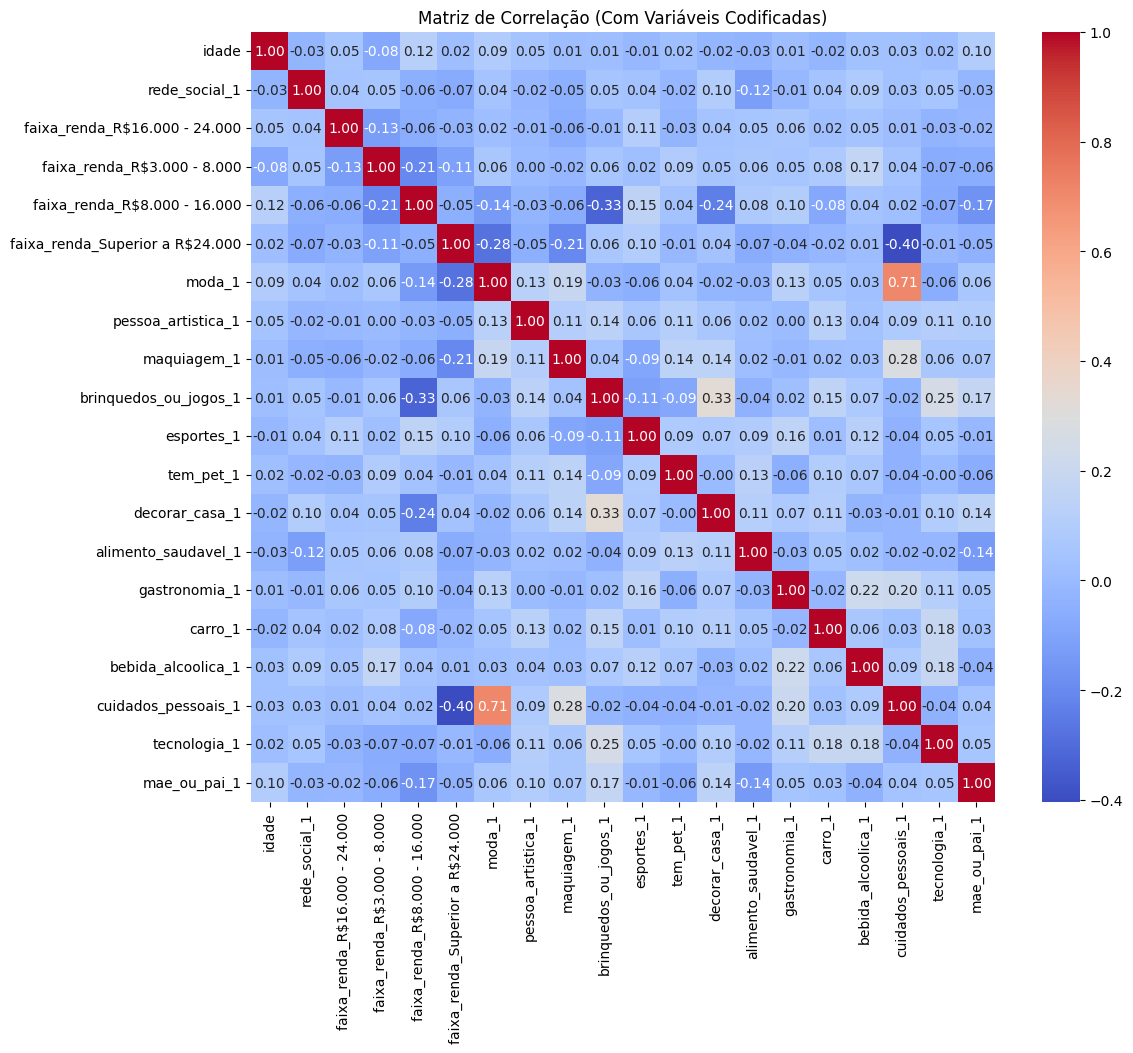

In [19]:
# Calcular a matriz de correlação
correlation_matrix = features.corr()

# Visualizar como heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação (Com Variáveis Codificadas)")
plt.show()


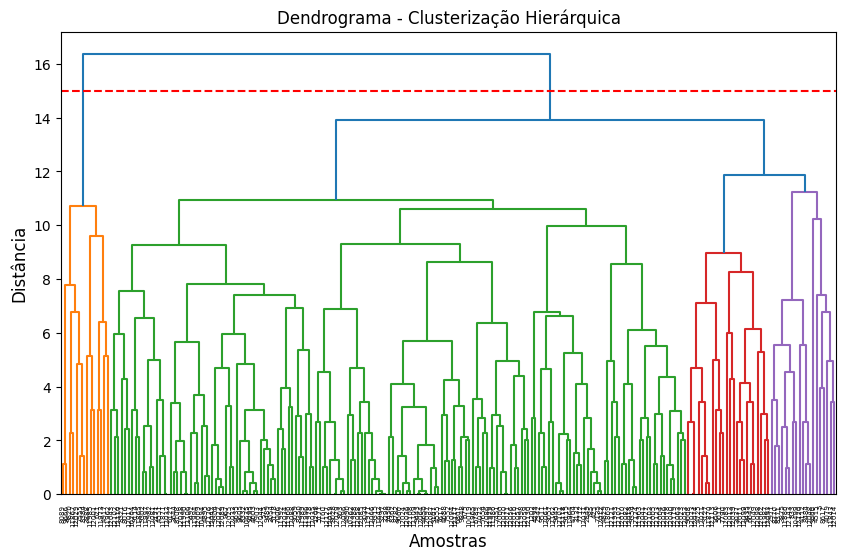

In [20]:
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(
    sch.linkage(features, method='complete', metric='cityblock'),
    orientation='top',  # Altere para 'left', 'right', 'top' ou 'bottom'
    labels=list(features.index) if hasattr(features, 'index') else None
)
plt.title('Dendrograma - Clusterização Hierárquica', fontsize=12)
plt.xlabel('Amostras', fontsize=12)
plt.ylabel('Distância', fontsize=12)
plt.axhline(y=15, color='red', linestyle='--')  # Defina o corte desejado
plt.show()

In [21]:
from sklearn.cluster import AgglomerativeClustering

# Ajustar o modelo de clusterização hierárquica
clusters = AgglomerativeClustering(n_clusters=4, metric='cityblock', linkage='complete')

# Obter os rótulos dos clusters
assinantes['cluster'] = clusters.fit_predict(features)

In [22]:
assinantes['cluster'].value_counts()

cluster
2    166
3     24
0     19
1     14
Name: count, dtype: int64

In [23]:
cluster1 = assinantes[assinantes['cluster'] == 0]
cluster2 = assinantes[assinantes['cluster'] == 1]
cluster3 = assinantes[assinantes['cluster'] == 2]
cluster4 = assinantes[assinantes['cluster'] == 3]


In [24]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Ajustar o modelo hierárquico
linkage_matrix = linkage(features, method='complete')

for n_clusters in range(2, 10):
    # Ajustar o modelo cortando em n_clusters
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = agglomerative.fit_predict(features)
    
    # Calcular o silhouette score
    silhouette_avg = silhouette_score(features, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters = 2, the silhouette score is 0.4757962246706307
For n_clusters = 3, the silhouette score is 0.10418201938541925
For n_clusters = 4, the silhouette score is 0.07792267324915586
For n_clusters = 5, the silhouette score is 0.07421248120206896
For n_clusters = 6, the silhouette score is 0.0654404137355664
For n_clusters = 7, the silhouette score is 0.07243284621432208
For n_clusters = 8, the silhouette score is 0.08118280750357408
For n_clusters = 9, the silhouette score is 0.08339973443042241


In [25]:
df_gosto.isnull().sum()

id_gosto_base             0
moda                      0
pessoa_artistica          0
maquiagem                 0
brinquedos_ou_jogos       0
esportes                  0
tem_pet                   0
decorar_casa              0
alimento_saudavel         0
gastronomia               0
carro                     0
bebida_alcoolica          0
cuidados_pessoais         0
tecnologia                0
mae_ou_pai                0
influencer                0
restricoes_alimentares    0
dtype: int64

In [26]:
if 'cluster' not in assinantes.columns:
    raise ValueError("A coluna 'cluster' não está presente no DataFrame assinantes.")

# Garantir que os índices de assinantes correspondem ao de df_gosto
# Isso assume que `id_gosto_base` é a chave de ligação entre os dois DataFrames
df_gosto = df_gosto.merge(assinantes[['id_gosto_base', 'cluster']], 
                          on='id_gosto_base', 
                          how='left')

# Preencher valores ausentes em 'cluster' com -1
df_gosto['cluster'] = df_gosto['cluster'].fillna(-1).astype(int)

Optamos por usar 4 clusteres e nao utilizar o genero, dado que precisavamos de uma segmentacao de dados um pouco maior.
Por termos poucos dados (~220 observacoes de assinantes) é provavel que eles estejam mal dispersos, trazendo um baixo sillouette score

In [27]:
# Escolher o número de clusters usando o método do cotovelo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

print(wcss)



[734.6860986547085, 606.2585536013742, 555.3930441127812, 521.1934327559993, 497.70683997189644, 474.2999146059516, 453.8324319068632, 435.8961470246793, 426.21576906076194, 414.0482616986792]


KNN - prever o cluster de um cliente a partir dos seus gostos

In [28]:
featuresKNN = assinantes1[[ 
       'faixa_renda', 
       'moda',  'maquiagem', 
       'esportes', 'tem_pet', 'decorar_casa', 'alimento_saudavel',
       'gastronomia', 'carro', 'bebida_alcoolica', 'cuidados_pessoais',
       'mae_ou_pai' , 'cluster', 'idade'
]]

In [29]:
featuresKNN = pd.get_dummies(featuresKNN, columns=[
       'faixa_renda', 
       'moda',  'maquiagem', 
       'esportes', 'tem_pet', 'decorar_casa', 'alimento_saudavel',
       'gastronomia', 'carro', 'bebida_alcoolica', 'cuidados_pessoais',
       'mae_ou_pai'
], drop_first=True)

In [30]:
# 1. Separar Features e Rótulos
# Aqui, 'featuresKNN' é o DataFrame que contém os dados já tratados
X = featuresKNN.drop(columns=['cluster'])  # Features
y = featuresKNN['cluster']  # Rótulos

# 2. Dividir os Dados em Treino e Teste
# 'X' ainda não está normalizado, isso será feito em um passo posterior
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=404)

# 3. Normalizar os Dados
scaler = MinMaxScaler()  # Escalador para colocar os dados entre 0 e 1
X_train_scaled = scaler.fit_transform(X_train)  # Ajusta o escalador e transforma os dados de treino
X_test_scaled = scaler.transform(X_test)  # Transforma os dados de teste com o mesmo escalador

# 4. Treinar o Modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Definindo o número de vizinhos
knn.fit(X_train_scaled, y_train)  # Treinando o modelo com os dados normalizados

# 5. Avaliar o Modelo
y_pred = knn.predict(X_test_scaled)  # Fazendo previsões no conjunto de teste
print(classification_report(y_test, y_pred))  # Relatório de desempenho do modelo

# 6. Selecionar os Não Assinantes
# Filtra a base original para pegar somente os não assinantes
X_nao_assinantes = base[base['assinantes'] == 0]

# 7. Manter Apenas as Colunas Relevantes
# Garante que somente as colunas úteis para o modelo sejam consideradas
X_nao_assinantes_columns = X_nao_assinantes[['faixa_renda', 
       'moda', 'maquiagem', 'idade', 'esportes', 'tem_pet', 'decorar_casa', 
       'alimento_saudavel', 'gastronomia', 'carro', 'bebida_alcoolica', 
       'cuidados_pessoais', 'mae_ou_pai']]

# 8. Gerar Dummies para Variáveis Categóricas
# Cria colunas binárias para categorias e remove a primeira para evitar multicolinearidade
X_nao_assinantes_dummified = pd.get_dummies(X_nao_assinantes_columns, columns=[
       'faixa_renda', 'moda', 'maquiagem', 'esportes', 'tem_pet', 
       'decorar_casa', 'alimento_saudavel', 'gastronomia', 'carro', 
       'bebida_alcoolica', 'cuidados_pessoais', 'mae_ou_pai'], drop_first=True)

# 10. Normalizar os Dados dos Não Assinantes
X_nao_assinantes_normalized = scaler.transform(X_nao_assinantes_dummified)

# 11. Prever os Clusters para os Não Assinantes
nao_assinantes['cluster_predito'] = knn.predict(X_nao_assinantes_normalized)

# 12. Atualizar o DataFrame Original com os Clusters Preditos
# Adiciona a coluna com os clusters previstos ao DataFrame original de gostos
df_gosto.loc[nao_assinantes.index, 'cluster_predito'] = nao_assinantes['cluster_predito']

# 13. Preencher Valores Faltantes
df_gosto['cluster_predito'] = df_gosto['cluster_predito'].fillna(-1)

# 14. Verificar os Resultados
print("Clusters previstos para os não assinantes:")
print(df_gosto[['id_gosto_base', 'cluster_predito']].head())
df_gosto['cluster_predito'].value_counts()


              precision    recall  f1-score   support

           0       0.56      0.45      0.50        11
           1       0.00      0.00      0.00         8
           2       0.80      0.97      0.88       102
           3       1.00      0.08      0.14        13

    accuracy                           0.78       134
   macro avg       0.59      0.38      0.38       134
weighted avg       0.75      0.78      0.72       134

Clusters previstos para os não assinantes:
   id_gosto_base  cluster_predito
0              1              0.0
1              2              2.0
2              3              2.0
3              4              0.0
4              5              2.0


cluster_predito
 2.0    10178
 0.0     1506
 3.0      287
-1.0      223
 1.0       16
Name: count, dtype: int64

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Treinar um modelo para avaliar a importância das features
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Importância das features
importances = pd.Series(rf.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False))


idade                              0.373650
bebida_alcoolica_1                 0.138114
mae_ou_pai_1                       0.081224
carro_1                            0.060453
esportes_1                         0.052770
faixa_renda_R$16.000 - 24.000      0.052072
faixa_renda_R$3.000 - 8.000        0.049568
gastronomia_1                      0.041639
tem_pet_1                          0.041348
decorar_casa_1                     0.039291
maquiagem_1                        0.033521
faixa_renda_R$8.000 - 16.000       0.032561
faixa_renda_Superior a R$24.000    0.002074
moda_1                             0.001239
alimento_saudavel_1                0.000475
cuidados_pessoais_1                0.000000
dtype: float64


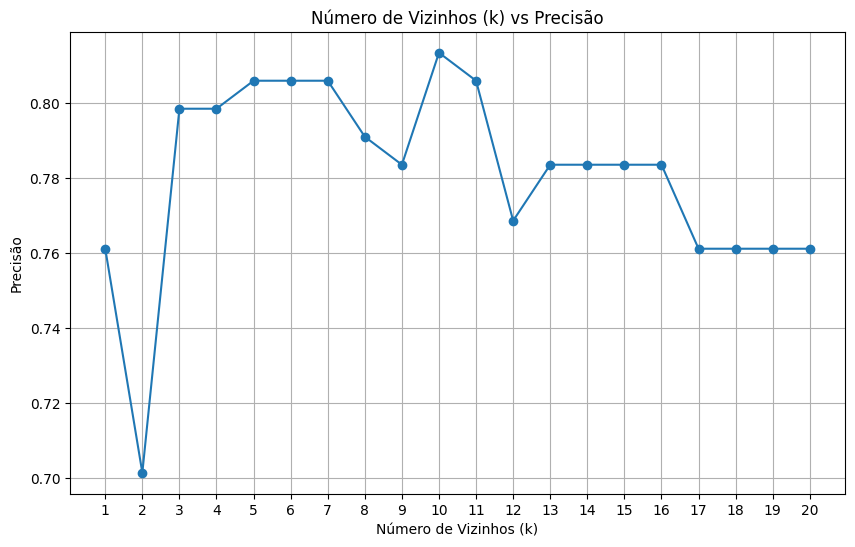

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Listas para armazenar os valores de k e a precisão correspondente
k_values = range(1, 21)  # Testar valores de k de 1 a 20
accuracy_scores = []

# Testar diferentes valores de k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('Número de Vizinhos (k) vs Precisão')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Precisão')
plt.xticks(k_values)
plt.grid()
plt.show()


In [35]:


# Caminho para o banco de dados
db_path = "/Users/leonardooliveira/Desktop/untitled folder/Experimentai/preparacao/Experimentai.db"

# Conectar ao banco de dados
conn = sqlite3.connect(db_path)

try:
    conn.execute("ALTER TABLE dim_gosto_cliente ADD COLUMN cluster INTEGER;")
except sqlite3.OperationalError:
    print("A coluna 'cluster' já existe na tabela 'dim_gosto_cliente'.")

# Atualizar os valores de 'cluster_predito' e 'cluster' na tabela
for index, row in df_gosto.iterrows():
    conn.execute("""
        UPDATE dim_gosto_cliente
        SET cluster = ?
        WHERE id_gosto_base = ?;
    """, (row['cluster'], row['id_gosto_base']))

# Salvar as alterações e fechar a conexão
conn.commit()
conn.close()

print("Os valores de 'cluster_predito' e 'cluster' foram atualizados com sucesso na tabela 'dim_gosto_cliente'.")


Os valores de 'cluster_predito' e 'cluster' foram atualizados com sucesso na tabela 'dim_gosto_cliente'.


In [36]:
import sqlite3
import pandas as pd

# Garantir que 'id_gosto_base' e 'cluster_predito' estão no formato correto
df_gosto['id_gosto_base'] = df_gosto['id_gosto_base'].astype(int)
df_gosto['cluster_predito'] = df_gosto['cluster_predito'].fillna(-1).astype(int)

# Conectar ao banco de dados
conn = sqlite3.connect(db_path)

# Passo 1: Adicionar a coluna 'cluster_predito' se ela ainda não existir
try:
    conn.execute("""
        ALTER TABLE dim_gosto_cliente ADD COLUMN cluster_predito INTEGER;
    """)
    print("Coluna 'cluster_predito' adicionada com sucesso.")
except sqlite3.OperationalError:
    print("A coluna 'cluster_predito' já existe na tabela 'dim_gosto_cliente'.")

# Passo 2: Atualizar os valores de 'cluster_predito' na tabela
for index, row in df_gosto.iterrows():
    conn.execute("""
        UPDATE dim_gosto_cliente
        SET cluster_predito = ?
        WHERE id_gosto_base = ?;
    """, (row['cluster_predito'], row['id_gosto_base']))

# Passo 3: Validar se todos os registros foram atualizados
# Obter a contagem de registros atualizados
updated_clusters = pd.read_sql_query("""
    SELECT id_gosto_base, cluster_predito FROM dim_gosto_cliente;
""", conn)

# Exibir a contagem dos clusters atualizados
print(updated_clusters['cluster_predito'].value_counts())

# Passo 4: Salvar e fechar a conexão
conn.commit()
conn.close()

print("Os valores de 'cluster_predito' foram atualizados com sucesso na tabela 'dim_gosto_cliente'.")


Coluna 'cluster_predito' adicionada com sucesso.
cluster_predito
 2    10178
 0     1506
 3      287
-1      223
 1       16
Name: count, dtype: int64
Os valores de 'cluster_predito' foram atualizados com sucesso na tabela 'dim_gosto_cliente'.
